# Orientation confirmation
This is just to check that the orientation (as in orientation bins) matches the positional data.

In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import pandas as pd
import fast_binning

Load a real file for inspection.

In [2]:
test_path = "onderive_data_2/12Hz/layer500.csv"
test = pd.read_csv(test_path,header=0,index_col=0)

Check path orientations in XY vs. orientation binning.

In [3]:
data_locs = (test.loc[:,"P"].values>0.0) & (test.loc[:,"X"].values > -77000) & (test.loc[:,"X"].values < -66000) & (test.loc[:,"Y"].values > 68000) & (test.loc[:,"Y"].values < 78000)
x = test[data_locs].loc[:130,"X"].values
y = test[data_locs].loc[:130,"Y"].values

In [4]:
var_labels = test.loc[:,"Photodiode":].columns.drop(["Z","Frame","Layer"]) # a list of metrics that correspond to dependent variables. 
var_labels = var_labels.append(pd.Index(["Distance traversed"])) # An extra variable, it's value is calculated by the expand_df function.

In [5]:
test_subset = fast_binning.expand_df(test[data_locs].loc[:130]) # Calculate extra derived variables. 
th_data = fast_binning.DataBins(["Orientation"],[np.linspace(-np.pi,np.pi,41,endpoint=True)],var_labels)
fast_binning.process_dataframe(test_subset,th_data,scan_section="all")

(<fast_binning.DataBins at 0x7f1a4ae9c2d0>,)

In [6]:
test_subset.head()

,P,X,Y,Photodiode,Spot Centroid X,Spot Centroid Y,Spot area (um2),Spot major axis (um),Spot minor axis (um),Spot orientation,...,Spatter number,Spatter total area,Spatter mean area,Spatter median area,Spatter mean mean intensity,Spatter median mean intensity,Orientation,Speed,Acceleration,Distance traversed
0,81.194099,-74129.548047,74499.516133,294526,63.0,72.0,11532.0,187.694366,101.754678,4.434210,...,NaN,NaN,NaN,NaN,NaN,NaN,1.987874,38.919593,2.086604,0.000000
1,228.847687,-74145.313984,74535.099414,295862,63.0,72.0,18739.5,194.984529,143.758473,0.142845,...,NaN,NaN,NaN,NaN,NaN,NaN,2.042015,70.495391,-0.702080,38.919593
2,167.692139,-74161.551016,74562.328633,290749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.962981,67.420992,0.435156,31.702863
3,226.323242,-74171.082812,74597.401562,295126,63.0,73.0,12493.0,161.080719,113.901273,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.960116,71.304730,-0.081301,36.345090
4,224.995621,-74188.615352,74628.297461,291327,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.955154,67.383361,-0.282944,35.523886


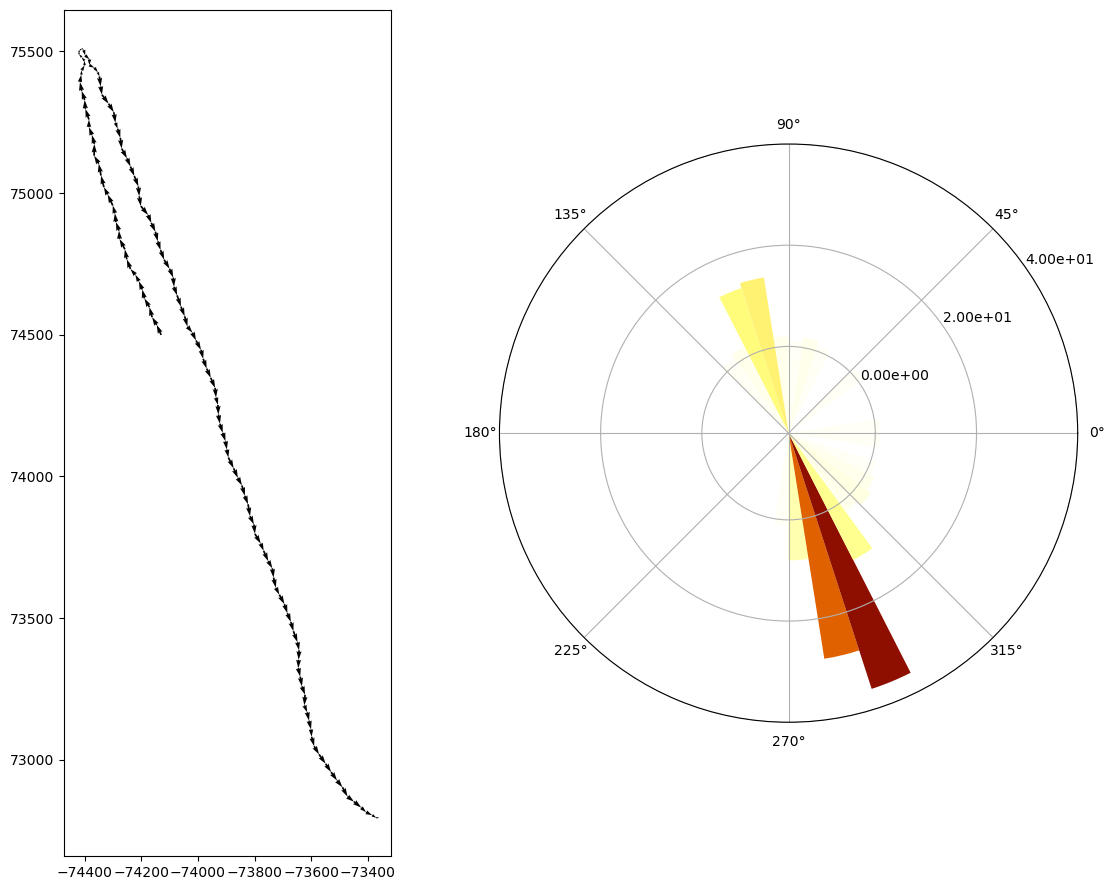

In [7]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,2,1)
#ax.plot(x,y,".-",ms=3.0)
ax.quiver(x[:-1],y[:-1],x[1:]-x[:-1],y[1:]-y[:-1],scale_units='xy',angles='xy',scale=1)
ax.set_aspect("equal")
ax = fig.add_subplot(1,2,2,polar=True)
fast_binning.plot_orientation_bins(ax,th_data,"Photodiode",quantity="count",vrange=(0,50))
fig.tight_layout()